In [1]:
def loss_accuracy_graph (history, n_epochs):
    train_accuracy = history['accuracy']
    train_loss = history['loss']
    validation_accuracy = history['val_accuracy']
    validation_loss = history ['val_loss']

    fig, axes = plt.subplots (1,2, figsize = (15,5))

    axes[0].plot (train_accuracy, label = 'training')
    axes[0].plot (validation_accuracy, label = 'validation')
    axes[0].set_xlim (0, n_epochs)
    axes[0].legend (loc = 'lower right')
    axes[0].grid (True)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Training and Validation Accuracy')

    axes[1].plot (train_loss, label = 'training')
    axes[1].plot (validation_loss, label = 'validation')
    axes[1].set_xlim (0, n_epochs)
    axes[1].legend (loc = 'upper right')
    axes[1].grid (True)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].set_title('Training and Validation Loss')

    
    fig.suptitle ('Overfitting trend of first 5 epochs of CNN model with large dataset')

    plt.tight_layout()
    plt.show()

This is from a CNN model trained on roughly 300.000 images (undersampled) and 1569 ARs. The model is clearly overfitting as can be seen from the learning curve. 

The data for this graph came from an older version of a notebook, because this training log was accidentally removed from the notebook. I made a history dataframe of the values in this training log, here is an image of the log from this older version of the notebook:

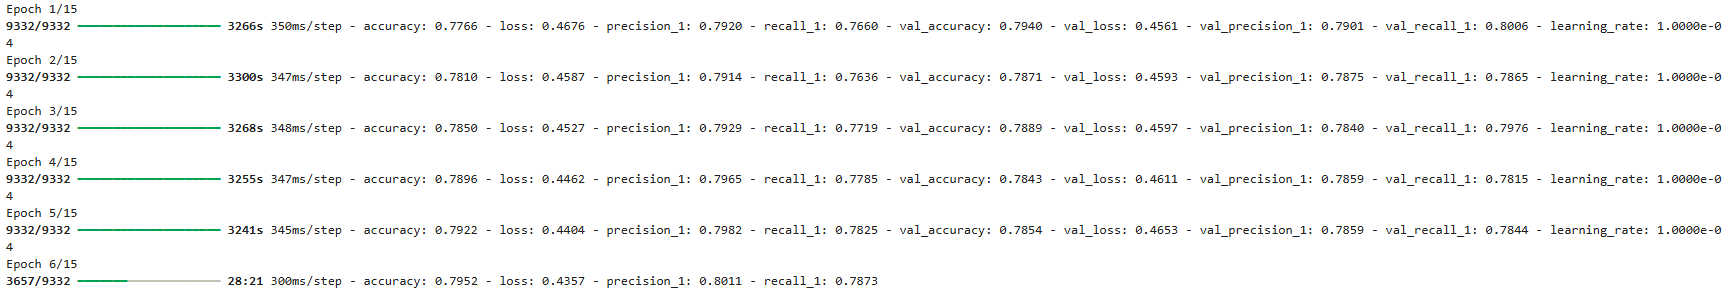

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

# Data for epochs
data = {
    'epoch': [1, 2, 3, 4, 5],
    'accuracy': [0.7766, 0.7810, 0.7850, 0.7896, 0.7922],
    'loss': [0.4676, 0.4587, 0.4527, 0.4462, 0.4404],
    'precision_1': [0.7920, 0.7914, 0.7929, 0.7965, 0.7982],
    'recall_1': [0.7660, 0.7636, 0.7719, 0.7785, 0.7825],
    'val_accuracy': [0.7940, 0.7871, 0.7889, 0.7843, 0.7854],
    'val_loss': [0.4561, 0.4593, 0.4597, 0.4611, 0.4653],
    'val_precision_1': [0.7901, 0.7875, 0.7840, 0.7859, 0.7859],
    'val_recall_1': [0.8006, 0.7865, 0.7976, 0.7815, 0.7844],
    'learning_rate': [1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04]
}

# Create dataframe
history_df = pd.DataFrame(data)



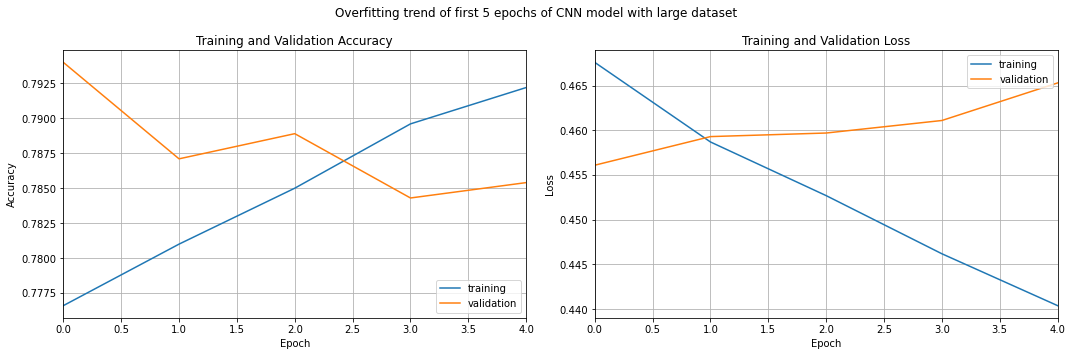

In [3]:
loss_accuracy_graph (history_df, 4)

# Showing redundant samples

In [22]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('train_us_fs.csv')

len (train)

298598

Redundant samples come from the same AR, these samples can look almost identical. 

In [7]:
#find samples in the same AR, in this case AR 2057 was chosen

AR = train[train['AR_number'] == 2057]

print ('There are {} similar samples in AR 2057'.format (len (AR)))

There are 245 similar samples in AR 2057


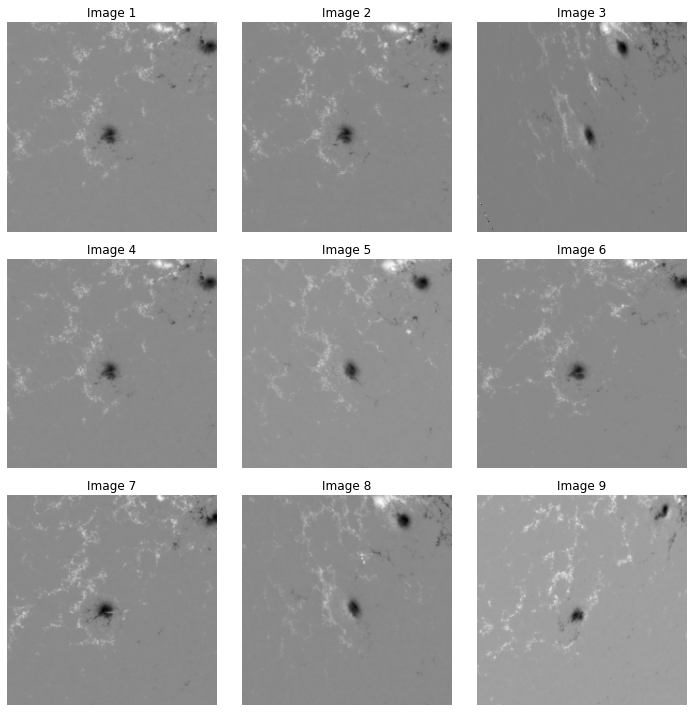

In [18]:
#print these samples

fig, axes = plt.subplots (3,3, figsize = (10,10))

AR = AR.sample(9) #take a random sample of this AR

for idx, (ax, f) in enumerate(zip(axes.ravel(), AR['filename'])):  
    filename = 'images_by_AR/' + f
    img = cv.imread(filename, cv.IMREAD_GRAYSCALE)  
    if img is not None:  
        ax.imshow(img, cmap='gray') 
        ax.axis('off') 
        ax.set_title(f"Image {idx+1}")  
    else:
        ax.text(0.5, 0.5, 'Error loading image', ha='center', va='center', color='red')
        ax.axis('off')  

plt.tight_layout()  
plt.show()

Investigating the same AR in the subsetted dataset

In [23]:
train_sub = pd.read_csv('train_us.csv')

len (train_sub)

74650

In [24]:
#find samples in the same AR, in this case AR 2057 was chosen

AR = train_sub[train_sub['AR_number'] == 2057]

print ('There are {} similar samples in AR 2057'.format (len (AR)))

#this reduced the number of images in the AR to 65 instead of 245

There are 65 similar samples in AR 2057


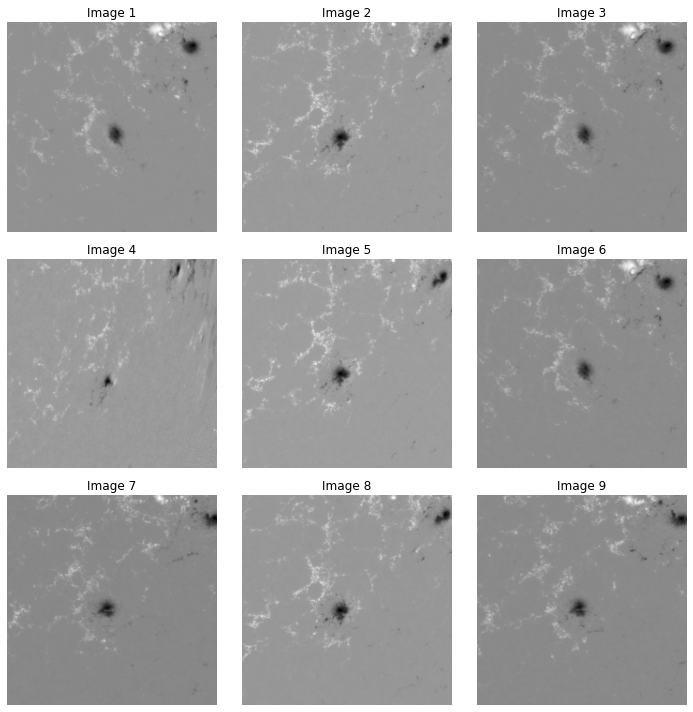

In [25]:
#print these samples

fig, axes = plt.subplots (3,3, figsize = (10,10))

AR = AR.sample(9) #take a random sample of this AR

for idx, (ax, f) in enumerate(zip(axes.ravel(), AR['filename'])):  
    filename = 'images_by_AR/' + f
    img = cv.imread(filename, cv.IMREAD_GRAYSCALE)  
    if img is not None:  
        ax.imshow(img, cmap='gray') 
        ax.axis('off') 
        ax.set_title(f"Image {idx+1}")  
    else:
        ax.text(0.5, 0.5, 'Error loading image', ha='center', va='center', color='red')
        ax.axis('off')  

plt.tight_layout()  
plt.show()